In [ ]:
from google.colab import drive
drive.mount("gdrive")

Mounted at gdrive


In [ ]:
%cd "/content/gdrive/My Drive/researchModel"

/content/gdrive/My Drive/researchModel


In [ ]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import apdn
import torch
%matplotlib inline

In [ ]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [ ]:
#now generate the ShanghaiA's ground truth
root = '/content/gdrive/My Drive/researchModel/ShanghaiTech_Dataset/'
part_A_train = os.path.join(root,'part_A_final/train_data','images')
part_A_test = os.path.join(root,'part_A_final/test_data','images')
part_B_train = os.path.join(root,'part_B_final/train_data','images')
part_B_test = os.path.join(root,'part_B_final/test_data','images')
path_sets = [part_A_test]

In [ ]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)

In [ ]:
print(len(img_paths))

182


In [ ]:
model = apdn()

In [ ]:
model = model.cuda()

In [ ]:
checkpoint = torch.load('apdn_checkpoint.pth.tar')

In [ ]:
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [ ]:
test_image_list = create_training_image_list(TEST_DATA_PATH)

In [ ]:
criterion = nn.MSELoss(size_average=False).cuda()

optimizer = torch.optim.SGD(model.parameters(), args.lr,
                            momentum=args.momentum,
                            weight_decay=args.decay)
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

In [ ]:
test_result = validate(test_image_list, model, criterion)  

begin test
 * MAE 64.824 
 * MSE 105.595 


Predicted Count :  339


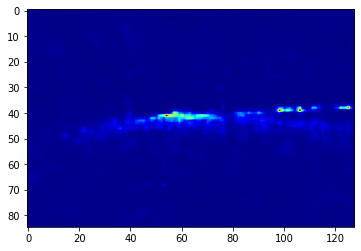

Original Count :  308


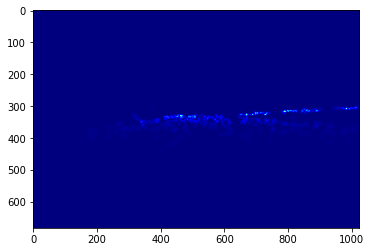

Original Image


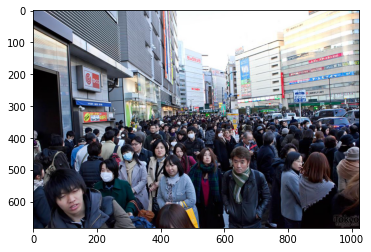

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_29.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_29.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_29.jpg'))
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Predicted Count :  301


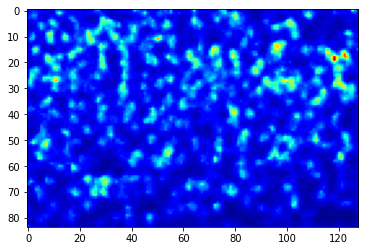

Original Count :  246


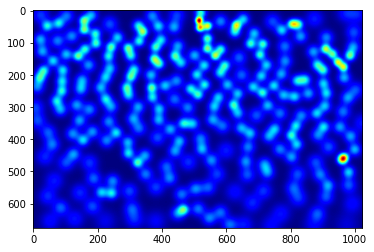

Original Image


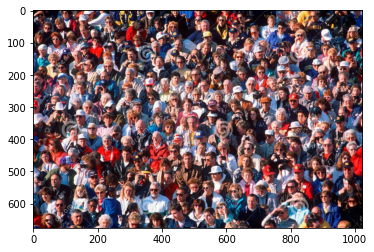

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_119.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_119.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_119.jpg'))
plt.show()

Predicted Count :  823


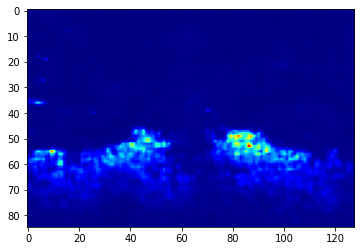

Original Count :  1324


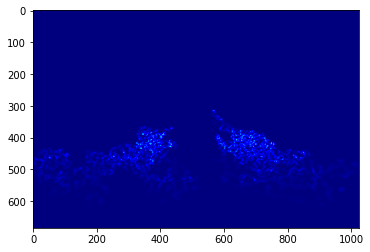

Original Image


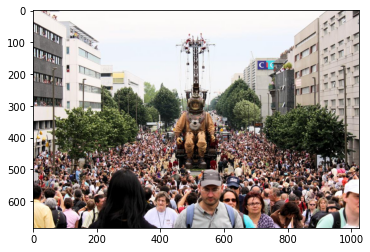

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_8.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_8.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_8.jpg'))
plt.show()

Predicted Count :  1280


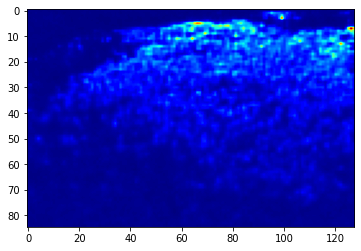

Original Count :  1106


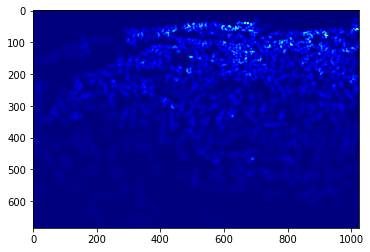

Original Image


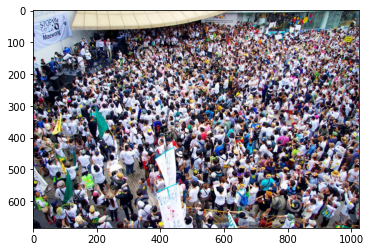

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_2.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_2.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_2.jpg'))
plt.show()

Predicted Count :  164


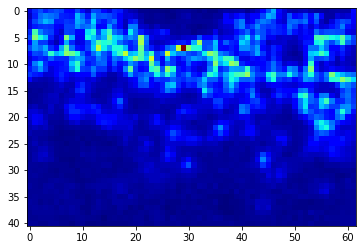

Original Count :  167


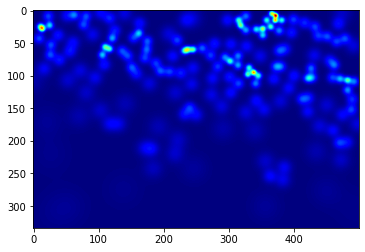

Original Image


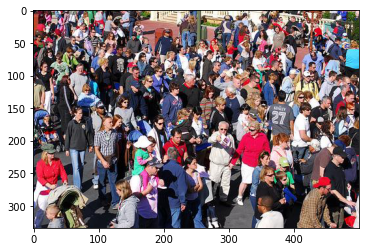

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_4.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_4.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_4.jpg'))
plt.show()

Predicted Count :  379


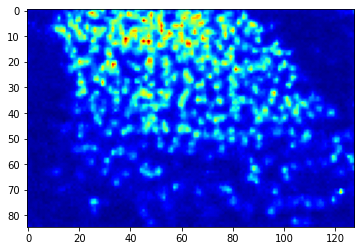

Original Count :  359


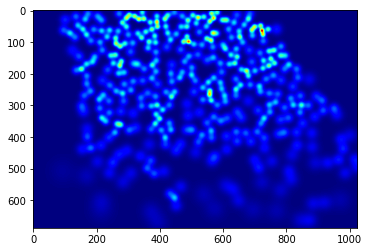

Original Image


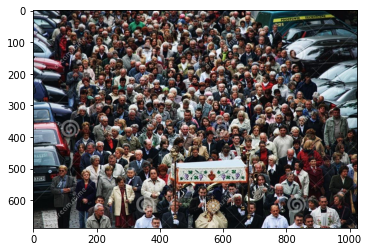

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_6.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_6.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_6.jpg'))
plt.show()

Predicted Count :  249


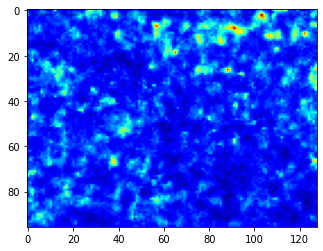

Original Count :  37


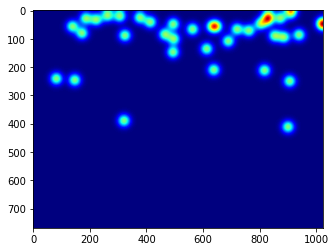

Original Image


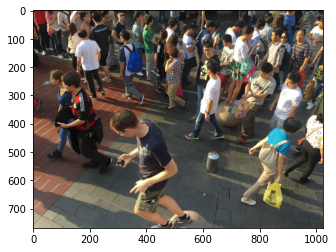

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_B_final/test_data/images/IMG_9.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_B_final/test_data/ground_truth/IMG_9.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_B_final/test_data/images/IMG_9.jpg'))
plt.show()

Predicted Count :  703


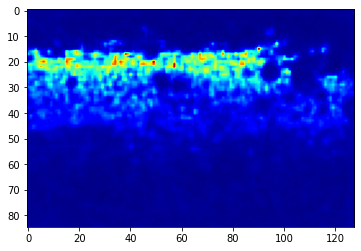

Original Count :  715


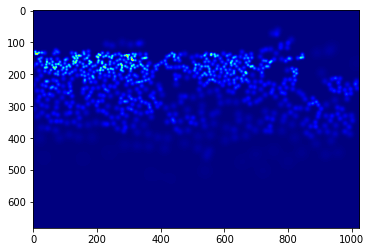

Original Image


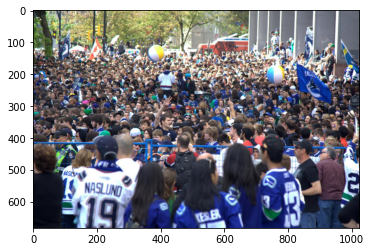

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_38.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_38.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_38.jpg'))
plt.show()

Predicted Count :  324


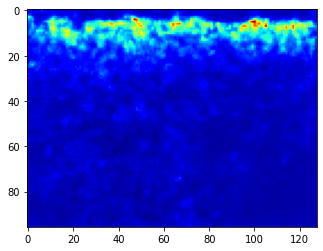

Original Count :  368


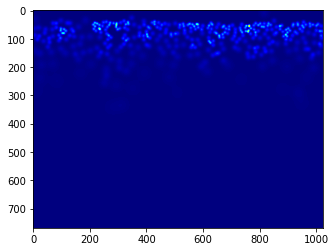

Original Image


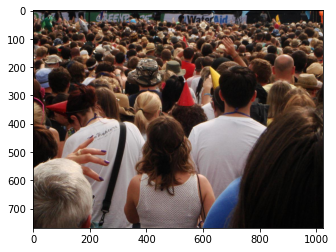

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_9.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_9.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_9.jpg'))
plt.show()

Predicted Count :  476


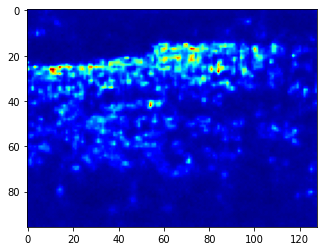

Original Count :  498


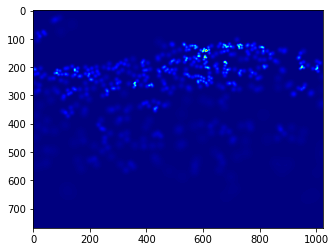

Original Image


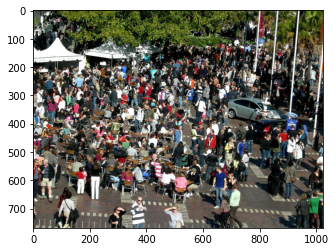

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_10.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_10.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_10.jpg'))
plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Predicted Count :  415


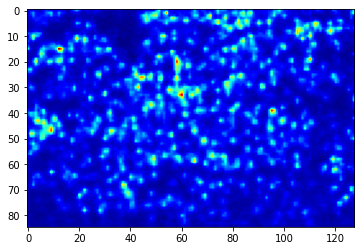

Original Count :  453


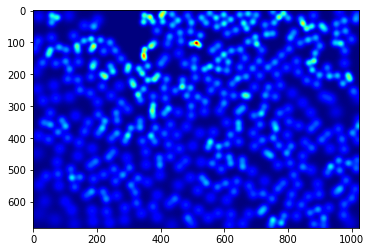

Original Image


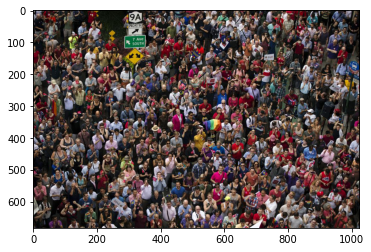

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_20.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_20.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_20.jpg'))
plt.show()

Predicted Count :  342


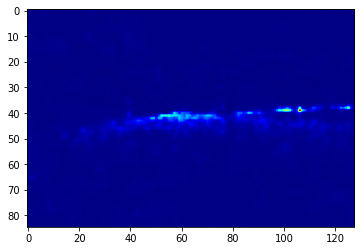

Original Count :  308


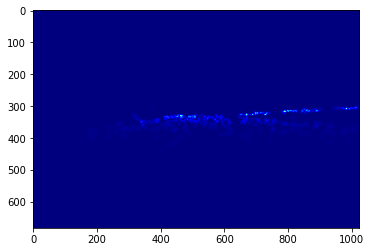

Original Image


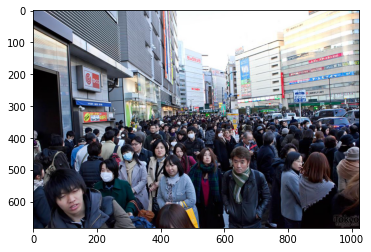

In [ ]:
from matplotlib import cm as c
img = transform(Image.open('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_29.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('ShanghaiTech_Dataset/part_A_final/test_data/ground_truth/IMG_29.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('ShanghaiTech_Dataset/part_A_final/test_data/images/IMG_29.jpg'))
plt.show()

In [ ]:
fypmodel = apdn()
print(fypmodel)

apdn(
  (frontend): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=